In [1]:
import serial
import csv
import time
import datetime
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np



Error en comunicacion
-0.0040130615,-0.0040130615,nan,0.00
0.7224273682,0.7224273682,3270.0102539063,1.00
0.6055450439,0.6055450439,3045.1831054688,4.00
0.5335693359,0.5335693359,2943.0229492188,6.00
0.6239624023,0.6239624023,2918.0993652344,8.00
0.4967498779,0.4967498779,2796.4223632813,10.00
0.6470489502,0.6470489502,2800.2321777344,13.00
0.6779479980,0.6779479980,2823.5026855469,15.00
0.6449737549,0.6449737549,2852.9028320313,18.00
0.6969604492,0.6969604492,2883.3149414063,20.00
0.6332244873,0.6332244873,2892.5903320313,23.00
0.6346130371,0.6346130371,2889.3457031250,25.00
0.6481628418,0.6481628418,2896.2390136719,28.00
0.6258850098,0.6258850098,2906.0415039063,30.00
0.6813049316,0.6813049316,2913.9162597656,33.00
0.5902404785,0.5902404785,2914.7929687500,35.00
0.6615753174,0.6615753174,2911.2080078125,38.00
0.6407928467,0.6407928467,2899.6303710938,40.00
0.5905761719,0.5905761719,2887.4995117188,42.00
0.6254577637,0.6254577637,2885.1047363281,44.00
0.6160736084,0.6160736084,2876.68

SerialException: read failed: [Errno 6] Device not configured

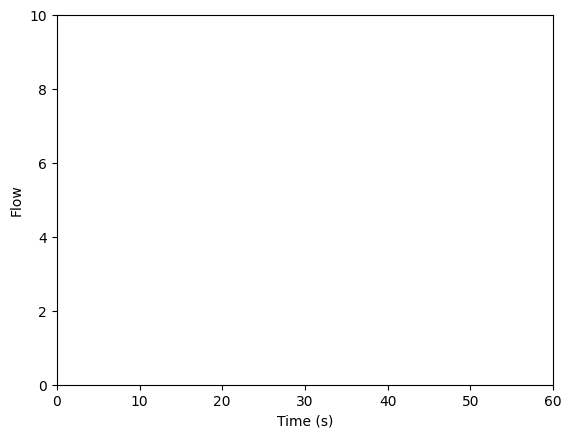

In [21]:
# Open the serial port (change the port and baud rate as needed)
ser = serial.Serial('/dev/cu.usbmodem1401', 9600)
# Read and plot the data in real time
with open('data_15_5.csv','w',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Timestamp', 'Volume Flow', 'Mass Flow', 'Average Flow', 'Totalizer']) 
    
    # Create the figure and subplot for the plot
    fig, ax = plt.subplots()
    
    # Set the x-axis limits and labels
    ax.set_xlim(0, 60) # Show the last 60 seconds of data
    ax.set_xlabel('Time (s)')
    
    # Set the y-axis limits and labels
    ax.set_ylim(0, 10) # Change the limits as needed
    ax.set_ylabel('Flow')
    
    # Create empty lists to store the data
    times = []
    volume_flows = []
    mass_flows = []
    average_flows = []
    totalizers = []
    initial_time = time.time()
    while True:
        try:
            # clear_output(wait=True)
            # Read a line of data from the serial port
            serial_line = ser.readline().strip().decode('utf-8')
            reception_time = time.time() - initial_time
            print(serial_line)
            # Split the line into four values
            values = serial_line.split(',')
            if len(values) == 4:
                # Get the current timestamp and save the values to the CSV file
                writer.writerow([reception_time, values[0], values[1], values[2], values[3]])

        # Close the CSV file and serial port when finished
        except KeyboardInterrupt:
            file.close()
            ser.close()